# Fashion MNIST: A Multi-Class Classification Problem
You will create a multi-class MLP network to solve a multi-class classification problem. Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset - a handwriting digit dataset often used as a "Hello World" dataset for machine learning. Fashion MNIST contains fashion item images, which turns out to be more challenging than MNIST.  

Fashion MNIST contains 60,000 training images and 10,000 test images, 28 x 28 pixels each, with 10 categories. 

<img src="w2-fashionMnist.png">


## 1. Load the dataset
Keras provides some utility functions to fetch and load some commonly used datasets, including Fashin MNIST. The `load_data()` method directly splits the training and test set. 

Since the class names are not included with the dataset, store them here to use later when plotting the images.

You may explore the format of the dataset, the data type of the input images, also display a few images to have a first impression of the dataset.

(60000, 28, 28)
(10000, 28, 28)
uint8


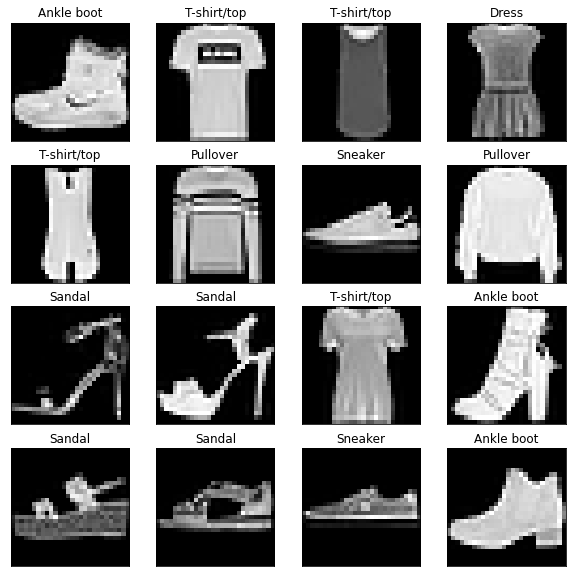

In [ ]:

from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Flatten
from keras.datasets import fashion_mnist 
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

n_classes = 10
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# exploring the format of the dataset, data types of the images 
# and also display a few images to have a first impression of the dataset

print(X_train.shape)
print(X_test.shape)
print(X_train.dtype)


plt.figure(figsize=(10,10))
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap='gray')
  plt.title(class_names[y_train[i]])




## 2. Prepare the data
Since pixel values in an image are in the same range [0, 255], we don't need to standarize or normalize the input data as what we did for the Indian Diebetes dataset. The only thing you are suppose to do for this dataset is to scale the pixel values down to the [0,1] range by simply dividing them by 255.0 (this also converts them to floats). 

In [ ]:
# Add your code here
# This is a classification problem. We are going to have to normalize the data by scaling down the pixels
X_train = X_train/255.0
# y_train  = y_train/255.0
X_test = X_test/255.0
# y_test = y_test/255.0


## 3. Build your network
Similar to the previous network you have created, you first create a `sequential` model, then add `Dense` layers one by one. The only difference here is that you need add a `Flattern` layer before the first `Dense` layer. The `Flattern` layer is to convert the 2-D image (28 x 28) into a 1-D array (784 x 1). This layer does not have any parameters, as it is just there to do simple preprocessing.

For the output layer, its node number would be the class number, the activation function for a multi-class problem is typically `softmax`.

In [ ]:
# Add your code here
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300, activation='relu', input_shape = (28*28,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes,activation='softmax'))
# output the model's structure
model.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 4. Compile the model
The typical loss function for a multi-class problem is the multi-class cross-entropy loss function. In Keras, there are two options. One is to use the `sparse_categorical_crossentropy` loss with the original sparse labels (i.e., for each image, there is just one actual class index, from 0 to 9 in this case). The other is to use `categorical_crossentropy` loss if the actual output is a one-hot vector (e.g., [0, 0, 1, 0, ...., 0]). In this case, you need first convert the current sparse label (i.e., class index) to one-hot vecore labels by using `keras.utils.to_categorical()` method.

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## 5. Train and validate the model
It is important for you to use a validation set to moniter your model. Also draw the learning curve on the training and validation sets, to see how your model is learnt and how it generalises to new data, then try to adjust your model or add any regularization techniques accordingly till you are satisfied.

In [ ]:
# Train the model
history = model.fit(X_train,y_train, epochs=20, batch_size=128, validation_split=0.2)


Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 3.4617 - accuracy: 0.7344 - val_loss: 0.8098 - val_accuracy: 0.7673
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6447 - accuracy: 0.7905 - val_loss: 0.6195 - val_accuracy: 0.7894
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.5337 - accuracy: 0.8179 - val_loss: 0.5866 - val_accuracy: 0.8142
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.5002 - accuracy: 0.8245 - val_loss: 0.5227 - val_accuracy: 0.8129
Epoch 5/20
375/375 [==============================] - 3s 8ms/step - loss: 0.4555 - accuracy: 0.8356 - val_loss: 0.5091 - val_accuracy: 0.8368
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4294 - accuracy: 0.8453 - val_loss: 0.4983 - val_accuracy: 0.8403
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4131 - accuracy: 0.8519 - val_loss: 0.4512 - val_accuracy: 0.8425
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot the graphs

Text(0.5, 0, 'epoch')

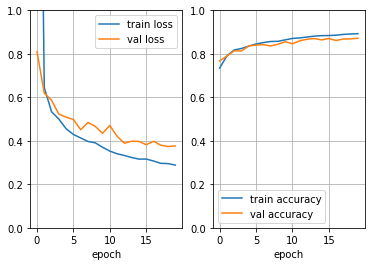

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.legend()
plt.grid(True)
# plt.xlim(0,120)
plt.ylim(0,1.0)
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
# plt.xlim([0,120])
plt.ylim([0,1.0])
plt.xlabel('epoch')



## 6. Evaluate the model
First evaluate your model on the test set to report the accuracy on the test set. Then You use the `model`'s `predict()` method to make predictions on new instances. Display a few images and compare their predicting classes with their actual classes.

313/313 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8629
Test accuracy: 0.8629
[[0.    0.    0.    0.    0.    0.001 0.    0.001 0.    0.998]
 [0.    0.    0.998 0.    0.001 0.    0.001 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


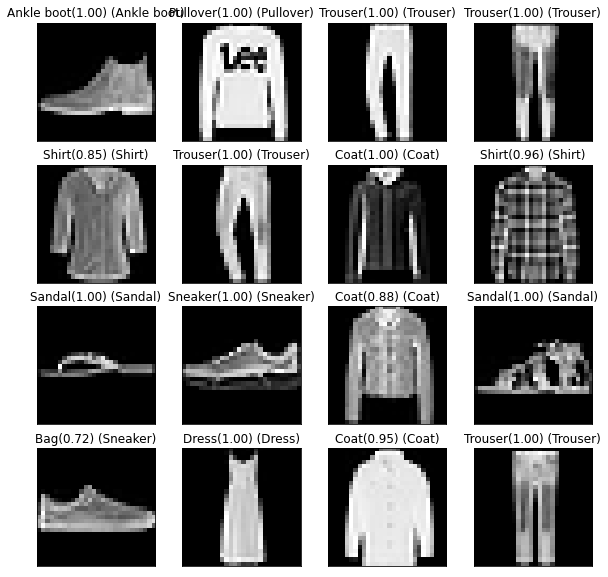

In [18]:
# evaluate the model
_,test_accu = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: %.4f' % test_accu)

y_predict = model.predict(X_test[:16])
print(y_predict[:4].round(3))

import numpy as np
plt.figure(figsize=(10,10))
for i in range(16): 
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i],cmap='gray')
    predict_class = np.argmax(y_predict[i])
    plt.title("%s(%.2f) (%s)" % (class_names[predict_class], np.max(y_predict[i]),class_names[y_test[i]]))





## Solution

One sample solution to this exercise will be made available through the course page once you submit your version. If you are completely stuck you can submit the file unfinished to see the solution – the submission is not graded, but you should try to get your version working.